# Optimización de Hiperparámetros con Optuna

Este cuaderno utiliza Optuna para optimizar modelos de clasificación: XGBoost, LightGBM y una red neuronal básica con sklearn, usando el dataset de churn en telecomunicaciones.

In [2]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb


c:\MLOPS\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Dataset de churn en telecomunicaciones (puedes reemplazar la ruta si tienes el archivo local)
url = 'C:\MLOPS\Proyecto_1\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
# Eliminar columnas no necesarias
df.drop(['customerID'], axis=1, inplace=True)

# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Variables
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Optimización de XGBoost con Optuna

In [4]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
study_xgb.best_params

[I 2025-04-03 19:03:57,716] A new study created in memory with name: no-name-df411372-8758-48da-a194-7afb390f4d9c
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-03 19:03:58,039] Trial 0 finished with value: 0.7916444444444445 and parameters: {'n_estimators': 211, 'max_depth': 3, 'learning_rate': 0.27

{'n_estimators': 129,
 'max_depth': 6,
 'learning_rate': 0.016729591486428066,
 'subsample': 0.5662881328188363,
 'colsample_bytree': 0.6917918262836544}

## Optimización de LightGBM con Optuna

In [5]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
study_lgb.best_params

[I 2025-04-03 19:04:09,734] A new study created in memory with name: no-name-b2015ed3-0adf-4dcd-b0eb-26de58249794


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:10,027] Trial 0 finished with value: 0.7790222222222223 and parameters: {'n_estimators': 145, 'max_depth': 6, 'learning_rate': 0.28405723786271314, 'subsample': 0.8821845737193392, 'colsample_bytree': 0.7762754595930466}. Best is trial 0 with value: 0.7790222222222223.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.2

[I 2025-04-03 19:04:10,346] Trial 1 finished with value: 0.7802666666666666 and parameters: {'n_estimators': 202, 'max_depth': 8, 'learning_rate': 0.2305900682600838, 'subsample': 0.749556447995904, 'colsample_bytree': 0.9845310814046746}. Best is trial 1 with value: 0.7802666666666666.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:10,666] Trial 2 finished with value: 0.8037333333333333 and parameters: {'n_estimators': 219, 'max_depth': 6, 'learning_rate': 0.029328715736054917, 'subsample': 0.8072713418625503, 'colsample_bytree': 0.9732289347563453}. Best is trial 2 with value: 0.8037333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 19:04:10,947] Trial 3 finished with value: 0.7845333333333334 and parameters: {'n_estimators': 279, 'max_depth': 5, 'learning_rate': 0.2799282453761132, 'subsample': 0.9098550281352761, 'colsample_bytree': 0.6386446566246713}. Best is trial 2 with value: 0.8037333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:11,063] Trial 4 finished with value: 0.7955555555555556 and parameters: {'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.2502276768714901, 'subsample': 0.9065370030343538, 'colsample_bytree': 0.5838227582305311}. Best is trial 2 with value: 0.8037333333333333.
[I 2025-04-03 19:04:11,218] Trial 5 finished with value: 0.7934222222222221 and parameters: {'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.2262420359065988, 'subsample': 0.5565783041033024, 'colsample_bytree': 0.5644189141729206}. Best is trial 2 with value: 0.8037333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:11,486] Trial 6 finished with value: 0.7808 and parameters: {'n_estimators': 353, 'max_depth': 4, 'learning_rate': 0.26650080865833947, 'subsample': 0.6944638990410774, 'colsample_bytree': 0.6682385109478488}. Best is trial 2 with value: 0.8037333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:11,666] Trial 7 finished with value: 0.7925333333333332 and parameters: {'n_estimators': 167, 'max_depth': 5, 'learning_rate': 0.19189247852076757, 'subsample': 0.6412743099945855, 'colsample_bytree': 0.6477471420368797}. Best is trial 2 with value: 0.8037333333333333.
[I 2025-04-03 19:04:11,798] Trial 8 finished with value: 0.8019555555555556 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.15585606816212105, 'subsample': 0.9547490342555336, 'colsample_bytree': 0.5822598271028356}. Best is trial 2 with value: 0.8037333333333333.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:11,919] Trial 9 finished with value: 0.8060444444444445 and parameters: {'n_estimators': 124, 'max_depth': 3, 'learning_rate': 0.08510030863962752, 'subsample': 0.8060649147276533, 'colsample_bytree': 0.5702678808778303}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-04-03 19:04:12,379] Trial 10 finished with value: 0.7959111111111111 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.05410210152757082, 'subsample': 0.509568730275159, 'colsample_bytree': 0.8050223823237437}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:12,764] Trial 11 finished with value: 0.7957333333333333 and parameters: {'n_estimators': 232, 'max_depth': 8, 'learning_rate': 0.0385068451827188, 'subsample': 0.8298784940279924, 'colsample_bytree': 0.9791219525696356}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:12,985] Trial 12 finished with value: 0.8030222222222222 and parameters: {'n_estimators': 351, 'max_depth': 3, 'learning_rate': 0.0882451502635218, 'subsample': 0.8003184837263754, 'colsample_bytree': 0.8765230575622625}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:13,298] Trial 13 finished with value: 0.7902222222222223 and parameters: {'n_estimators': 237, 'max_depth': 7, 'learning_rate': 0.10171436980448849, 'subsample': 0.9968883513789082, 'colsample_bytree': 0.8806592815352254}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:13,962] Trial 14 finished with value: 0.8014222222222221 and parameters: {'n_estimators': 393, 'max_depth': 10, 'learning_rate': 0.01922847962155587, 'subsample': 0.7683446700514832, 'colsample_bytree': 0.5203285405243276}. Best is trial 9 with value: 0.8060444444444445.
[I 2025-04-03 19:04:14,080] Trial 15 finished with value: 0.8031999999999999 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning_rate': 0.0890889248632113, 'subsample': 0.7150295811116162, 'colsample_bytree': 0.7152885390675998}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

[I 2025-04-03 19:04:14,364] Trial 16 finished with value: 0.7936 and parameters: {'n_estimators': 203, 'max_depth': 6, 'learning_rate': 0.11916866380203675, 'subsample': 0.8542657517581471, 'colsample_bytree': 0.8961094636509598}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:14,883] Trial 17 finished with value: 0.8000000000000002 and parameters: {'n_estimators': 273, 'max_depth': 8, 'learning_rate': 0.061159973980544693, 'subsample': 0.6432717694222985, 'colsample_bytree': 0.500630067931396}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:15,416] Trial 18 finished with value: 0.8033777777777779 and parameters: {'n_estimators': 315, 'max_depth': 7, 'learning_rate': 0.015675036731239714, 'subsample': 0.8277622431057988, 'colsample_bytree': 0.8257460332201794}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:15,786] Trial 19 finished with value: 0.7843555555555556 and parameters: {'n_estimators': 212, 'max_depth': 9, 'learning_rate': 0.13998642209677062, 'subsample': 0.6605785458689135, 'colsample_bytree': 0.7286311031879944}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:16,005] Trial 20 finished with value: 0.8032 and parameters: {'n_estimators': 167, 'max_depth': 5, 'learning_rate': 0.05923684316059398, 'subsample': 0.7619247847199001, 'colsample_bytree': 0.9404659274619077}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:16,565] Trial 21 finished with value: 0.8037333333333333 and parameters: {'n_estimators': 314, 'max_depth': 7, 'learning_rate': 0.010246459774303187, 'subsample': 0.8168757717303551, 'colsample_bytree': 0.8245029346714343}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[I 2025-04-03 19:04:17,150] Trial 22 finished with value: 0.8044444444444444 and parameters: {'n_estimators': 332, 'max_depth': 7, 'learning_rate': 0.011381831331752728, 'subsample': 0.795275947232091, 'colsample_bytree': 0.9263335454331053}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds

[I 2025-04-03 19:04:17,692] Trial 23 finished with value: 0.7985777777777777 and parameters: {'n_estimators': 383, 'max_depth': 6, 'learning_rate': 0.037660825272316914, 'subsample': 0.7894889407254337, 'colsample_bytree': 0.9250754675380378}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:18,116] Trial 24 finished with value: 0.7934222222222224 and parameters: {'n_estimators': 251, 'max_depth': 9, 'learning_rate': 0.06725540432090646, 'subsample': 0.7188523920896603, 'colsample_bytree': 0.9684985305013328}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:18,351] Trial 25 finished with value: 0.8053333333333333 and parameters: {'n_estimators': 335, 'max_depth': 3, 'learning_rate': 0.03859768468265022, 'subsample': 0.8779767900931769, 'colsample_bytree': 0.9990698037822503}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:18,602] Trial 26 finished with value: 0.7982222222222223 and parameters: {'n_estimators': 344, 'max_depth': 3, 'learning_rate': 0.11619133470644614, 'subsample': 0.8686393478404872, 'colsample_bytree': 0.9204177429867643}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 19:04:18,819] Trial 27 finished with value: 0.8021333333333334 and parameters: {'n_estimators': 316, 'max_depth': 3, 'learning_rate': 0.07959776643060637, 'subsample': 0.9256276528945964, 'colsample_bytree': 0.9980063032077133}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-03 19:04:19,211] Trial 28 finished with value: 0.8001777777777778 and parameters: {'n_estimators': 362, 'max_depth': 5, 'learning_rate': 0.04504105927305692, 'subsample': 0.9592962535338325, 'colsample_bytree': 0.6878098491731911}. Best is trial 9 with value: 0.8060444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 19:04:19,497] Trial 29 finished with value: 0.7923555555555555 and parameters: {'n_estimators': 334, 'max_depth': 4, 'learning_rate': 0.1550420278796567, 'subsample': 0.8714422851707486, 'colsample_bytree': 0.7752236842155282}. Best is trial 9 with value: 0.8060444444444445.


{'n_estimators': 124,
 'max_depth': 3,
 'learning_rate': 0.08510030863962752,
 'subsample': 0.8060649147276533,
 'colsample_bytree': 0.5702678808778303}

## Optimización de Red Neuronal (MLPClassifier) con Optuna

In [6]:
def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)

    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                       alpha=alpha,
                                                       learning_rate_init=learning_rate_init,
                                                       max_iter=500, random_state=42))
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=30)
study_nn.best_params

[I 2025-04-03 19:04:19,518] A new study created in memory with name: no-name-e47d5e29-7aa8-4feb-b639-a2d2d93408c8
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64,) which is of type tuple.
  warnings.warn(message)
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128,) which is of type tuple.
  warnings.warn(message)
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64, 32) which is of type tuple.
  warnings.warn(message)
[I 2025-04-03 19:04:20,444] Trial 0 finished with value: 0.7770666666666667 and parameters: {'hidden_layer_sizes': (6

{'hidden_layer_sizes': (64, 32),
 'alpha': 0.0011843556809265046,
 'learning_rate_init': 0.06266712534809868}

## Visualización de Importancia de Hiperparámetros

C:\Users\usuario\AppData\Local\Temp\ipykernel_10436\3701761657.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_xgb = vis.plot_param_importances(study_xgb)


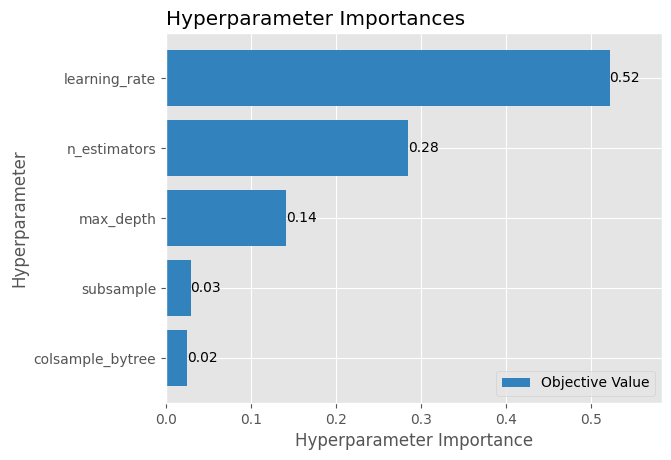

C:\Users\usuario\AppData\Local\Temp\ipykernel_10436\3701761657.py:10: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_lgb = vis.plot_param_importances(study_lgb)


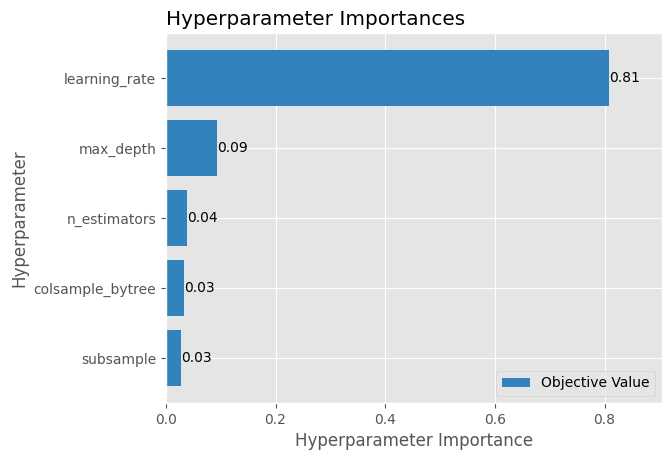

C:\Users\usuario\AppData\Local\Temp\ipykernel_10436\3701761657.py:15: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_nn = vis.plot_param_importances(study_nn)


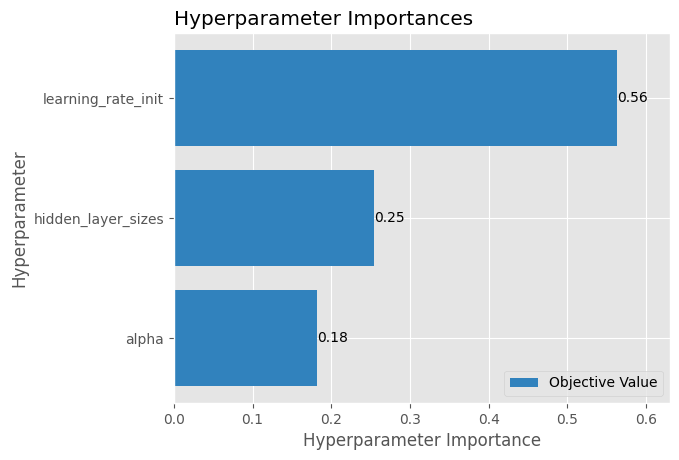

In [7]:
import optuna.visualization.matplotlib as vis
import matplotlib.pyplot as plt

# Visualización para XGBoost
fig_xgb = vis.plot_param_importances(study_xgb)
#fig_xgb.gca().set_title("Importancia de Hiperparámetros - XGBoost")
plt.show()

# Visualización para LightGBM
fig_lgb = vis.plot_param_importances(study_lgb)
#fig_lgb.gca().set_title("Importancia de Hiperparámetros - LightGBM")
plt.show()

# Visualización para Red Neuronal
fig_nn = vis.plot_param_importances(study_nn)
#fig_nn.gca().set_title("Importancia de Hiperparámetros - MLPClassifier")
plt.show()